# <center>DAT407 Assignment 7 – Group 19</center>
### <center>Avinash Shukla - 8 hours</center>
### <center>Josef Rasheed - 8 hours</center>
### <center>May 17, 2023</center>

Assignment 7: Neural Networks using Keras and Tensorflow

In [1]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

**1.1 (1/2)** In this step, we need to adjust the data to a more convenient scale because our original data values range from 0 to 255. To do this, we convert the data type from whole numbers (integers) to decimals (floats). Then, we normalize the data by dividing each value by 255. By doing this, we ensure that all the data values are between 0 and 1, which makes it easier to work with.

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)


**1.1 (2/2)** Now that we have prepared the data, it's time to set up the model. In this case, we are using a sequential model, which is suitable for tasks like classifying images. The sequential model is designed by stacking layers on top of each other in a specific order to create the model structure. These layers work together to process the input data and make predictions.

In [4]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
print('Highest validation accuracy: ' + str(np.max(fit_info.history.get('val_accuracy'))))

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4820 - accuracy: 0.8603 - val_loss: 0.2413 - val_accuracy: 0.9309
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2234 - accuracy: 0.9351 - val_loss: 0.1879 - val_accuracy: 0.9469
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1717 - accuracy: 0.9499 - val_loss: 0.1574 - val_accuracy: 0.9527
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1408 - accuracy: 0.9596 - val_loss: 0.1295 - val_accuracy: 0.9594
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1205 - accuracy: 0.9649 - val_loss: 0.1280 - val_accuracy: 0.9633
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1063 - accuracy: 0.9691 - val_loss: 0.1132 - val_accuracy: 0.9656
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0945 - accuracy: 0.9725 - val_loss: 0.1049 - val_accuracy: 0.9680
Epoch 

In [5]:
# Using the model.summary we can get an overview of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


**2.1** Our model has four layers: an input layer, two hidden layers, and an output layer. 
The input layer takes the 28x28 image and flattens it into a single line of 784 pixels. 
The two hidden layers have 64 neurons each, and the output layer has 10 neurons 
representing the numbers 0-9. The number of neurons in the hidden layers can 
change to find the best results. Overall, the model has 55,050 parameters, 
which are the variables it learns during training.

Most of the layers in our model use a special type of mathematical function 
called Rectified Linear Unit (ReLu) activation. ReLu is popular because 
it's fast and doesn't involve complex calculations. 
It helps avoid a problem called vanishing gradients, 
where the model struggles to learn when the gradients become very small. 
The output layer, however, uses a different activation function called softmax. 
This function creates a distribution of probabilities for each classification, 
where the probabilities add up to one. It then activates the neuron with the highest probability, 
which gives us the final output of our model.

**2.2** The loss function we use is called categorical crossentropy. 
It's used when we have multiple classes, and each sample belongs 
to only one class. The purpose of this function is to measure how 
different the predicted probabilities are from the true class labels. 
It helps the model learn to predict the correct class for each sample.

The formula for categorical crossentropy calculates the negative 
sum of the true label multiplied by the logarithm of the predicted 
probability for each class. This formula helps us quantify the dissimilarity 
between the predicted probabilities and the actual labels. By minimizing 
this loss during training, the model gets better at making accurate predictions.

**2.3**

<function matplotlib.pyplot.show(close=None, block=None)>

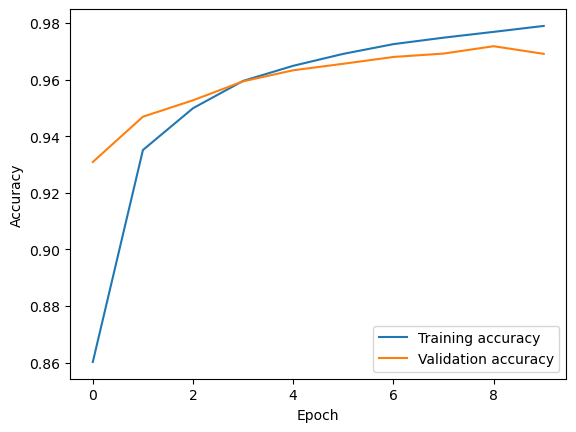

In [6]:
# Plotting the training and validation accuracy for each epoch
epoch = list(range(0,10))

accuracy = fit_info.history['accuracy']
val_accuracy = fit_info.history['val_accuracy']

plt.plot(epoch,accuracy, label = 'Training accuracy' )
plt.plot(epoch,val_accuracy,label = 'Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show

**2.4**

In [7]:
## Updated model
model2 = Sequential()

model2.add(Flatten())
model2.add(Dense(500, activation = 'relu'))
model2.add(Dense(300, activation = 'relu'))
model2.add(Dense(num_classes, activation='softmax'))


model2.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model2.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=40,
           verbose=0,
           validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
print('Highest validation accuracy: ' + str(np.max(fit_info.history.get('val_accuracy'))))

Test loss: 0.06875218451023102, Test accuracy 0.9810000061988831
Highest validation accuracy: 0.9818999767303467


The best validation accuracy we could achieve is 0.9819. Now let's try implementing weight decay.

In [8]:
## Updated model with weight decay
from tensorflow.keras import regularizers

regularization_factors = [0.001, 0.00075, 0.0005, 0.00025, 0.000001]
results={}
highest_acc=[]

for i in regularization_factors:
    results[i] = []
    for j in range(3):

        ## Define model3 ##
        model3 = Sequential()

        model3.add(Flatten())
        model3.add(Dense(500, activation = 'relu', kernel_regularizer=regularizers.l2(i)))
        model3.add(Dense(300, activation = 'relu',kernel_regularizer=regularizers.l2(i)))
        model3.add(Dense(num_classes, activation='softmax'))


        model3.compile(loss=keras.losses.categorical_crossentropy,
                    optimizer=keras.optimizers.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

        fit_info = model3.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=40,
                verbose=0,
                validation_data=(x_test, y_test))
        score = model3.evaluate(x_test, y_test, verbose=0)
        print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
        print(i)
        results[i].append(np.max(fit_info.history.get('val_accuracy')))
        highest_acc.append(np.max(fit_info.history.get('val_accuracy')))
print(results)
print('Highest validation accuracy: ' + str(np.max(highest_acc)))

Test loss: 0.11776416003704071, Test accuracy 0.9815000295639038
0.001
Test loss: 0.12149743735790253, Test accuracy 0.9807999730110168
0.001
Test loss: 0.11831645667552948, Test accuracy 0.9815000295639038
0.001
Test loss: 0.1224227324128151, Test accuracy 0.9790999889373779
0.00075
Test loss: 0.11858780682086945, Test accuracy 0.98089998960495
0.00075
Test loss: 0.1115642562508583, Test accuracy 0.9818000197410583
0.00075
Test loss: 0.10884205251932144, Test accuracy 0.9828000068664551
0.0005
Test loss: 0.10866054892539978, Test accuracy 0.9829999804496765
0.0005
Test loss: 0.11244098097085953, Test accuracy 0.9818000197410583
0.0005
Test loss: 0.1211809441447258, Test accuracy 0.9830999970436096
0.00025
Test loss: 0.12106528133153915, Test accuracy 0.9817000031471252
0.00025
Test loss: 0.12313398718833923, Test accuracy 0.9810000061988831
0.00025
Test loss: 0.06934043765068054, Test accuracy 0.9817000031471252
1e-06
Test loss: 0.06594930589199066, Test accuracy 0.9817000031471252
1e

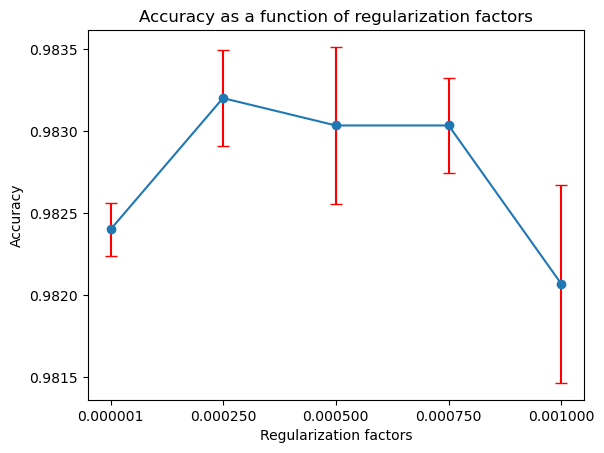

In [18]:
stds = np.array([np.std(i) for i in results.values()])
val_acc = np.array([np.mean(i) for i in results.values()])

# Plot validation accuracy and standard deviation as error bars
plt.errorbar(regularization_factors, val_acc, yerr=stds, fmt='-o', ecolor='r', capsize=4)
# Set plot labels and title
plt.xlabel('Regularization factors')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of regularization factors')
plt.gca().set_xticks([0.001, 0.00075, 0.0005, 0.00025, 0.000001])

The highest accuracy achieved in our experiment was 0.9837, which was slightly lower than Hilton's result. There could be a few reasons for this difference. One possible reason is that we used a different number of training epochs compared to Hilton. Using a higher number of epochs, up to a certain point, can improve accuracy. On the other hand, using too many epochs can lead to overfitting the model and resultin lower accuracy. So, the difference in accuracy might be due to the variation in the number of epochs use. Another factor that can affect accuracy is the regularization factor. In our case, we tried different factors and observed different accuracies. Hilton mentioned using five factors within a certain range,but the specific factors chosen may have been different between our experiment and Hilton's. These variations in the regularization factor can also contribute to the differencein accuracy between the two results.

In [15]:
# Model with Convolutional layers
model4 = Sequential()

model4.add(Conv2D(32,kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(num_classes, activation='softmax'))


model4.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model4.fit(x_train, y_train,
           batch_size=64,
           epochs=10,
           verbose=1,
           validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
938/938 [==============================] - 17s 17ms/step - loss: 0.2539 - accuracy: 0.9211 - val_loss: 0.0820 - val_accuracy: 0.9751
Epoch 2/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.0685 - val_accuracy: 0.9776
Epoch 3/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0800 - val_accuracy: 0.9748
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0514 - val_accuracy: 0.9833
Epoch 5/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0331 - accuracy: 0.9898 - val_loss: 0.0327 - val_accuracy: 0.9883
Epoch 6/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.0372 - val_accuracy: 0.9868
Epoch 7/10
938/938 [==============================] - 16s 17ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0283 - val_accuracy:

In [16]:
# Using the model.summary we can get an overview of our model
model4.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_21 (Flatten)        (None, 1600)              0         
                                                                 
 dense_59 (Dense)            (None, 64)              

As we can see, a combination of Convolutional, Max Pooling and and Dense layers can achive a 99% validation accuracy in under 10 epochs. Max Pooling downsamples the data and makes is run faster. In some cases, Max Pooling can also help with over fitting.

Convolutional layers are usually very good when processing grid-like data such as images. They are very good at learning and finding features. Convolutional layers are also more efficient than fully connected layers because they reduce the number of parameters that need to be learned and thus reduce the risk of overfitting. In contrast, fully connected layers connect every neuron in one layer to every neuron in the other layer. This makes them more flexible in learning but also requires more parameters and is more prone to overfitting. Because of their flexibility, they can more generally be used in many different applications.